In [3]:
import os

import csv

import torch
import torch.utils.data
from PIL import Image


print(os.listdir(r"D:\Datasets\Glycoma dataset 1 - 6gb\ORIGA\Images_Square"))

allRows = []
with open(r"D:\Datasets\Glycoma dataset 1 - 6gb\ORIGA\OrigaList.csv") as file:
    myData = csv.reader(file)
    for row in myData:
        allRows.append(row)

print(allRows)



img = Image.open(r"D:\Datasets\Glycoma dataset 1 - 6gb\ORIGA\Images_Square\001.jpg")
print(img)



['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '015.jpg', '016.jpg', '017.jpg', '018.jpg', '019.jpg', '020.jpg', '021.jpg', '022.jpg', '023.jpg', '024.jpg', '025.jpg', '026.jpg', '027.jpg', '028.jpg', '029.jpg', '030.jpg', '031.jpg', '032.jpg', '033.jpg', '034.jpg', '035.jpg', '036.jpg', '037.jpg', '038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.jpg', '052.jpg', '053.jpg', '054.jpg', '055.jpg', '056.jpg', '057.jpg', '058.jpg', '059.jpg', '060.jpg', '061.jpg', '062.jpg', '063.jpg', '064.jpg', '065.jpg', '066.jpg', '067.jpg', '068.jpg', '069.jpg', '070.jpg', '071.jpg', '072.jpg', '073.jpg', '074.jpg', '075.jpg', '076.jpg', '077.jpg', '078.jpg', '079.jpg', '080.jpg', '081.jpg', '082.jpg', '083.jpg', '084.jpg', '085.jpg', '086.jpg', '087.jpg', '088.jpg', '089.jpg', '090.jpg', '091.jpg'

In [4]:


import torchvision.transforms as transforms



transform = transforms.Compose([transforms.ToTensor()])



path = r"D:\Datasets\Glycoma dataset 1 - 6gb\ORIGA\Images_Square"
dataAndLables = []



for indx,img in enumerate(os.listdir(path)):
    imgTensor = transform(Image.open(path+"\\"+img))
    if(allRows[indx+1][1]==img):
        label = torch.tensor(int(allRows[indx+1][4]))
        dataAndLables.append((imgTensor, label))

    else:
        print(img)
        break




print(dataAndLables[0])



(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor(0))


In [5]:
# print(dataAndLables[0][0])
print(torch.max(dataAndLables[0][0]))
print(torch.min(dataAndLables[0][0]))
print(dataAndLables[0][0].shape)
print(dataAndLables[0][0].dtype)
print(len(dataAndLables))




tensor(1.)
tensor(0.)
torch.Size([3, 512, 512])
torch.float32
650


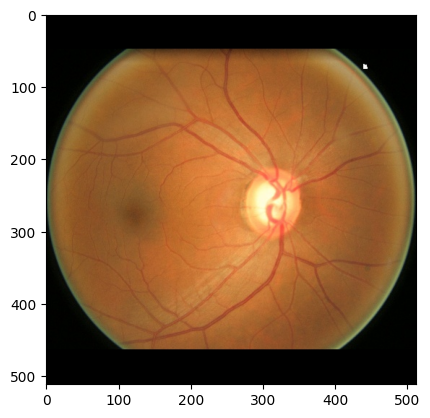

In [6]:
import matplotlib.pyplot as plt

plt.imshow(dataAndLables[0][0].permute(1,2,0))

In [7]:
imgLabelPairDict = {}
for dataPoint in dataAndLables:
    imgLabelPairDict[dataPoint[0]] = dataPoint[1]

# print(imgLabelPairDict)
print(dataAndLables.__len__())
print(imgLabelPairDict.__len__())

# remember dataAndLables is list of tuples while the key for the dict is the image itself 
print(imgLabelPairDict.get(dataAndLables[644][0]))
print(dataAndLables[644][0].shape)




650
650
tensor(1)
torch.Size([3, 512, 512])


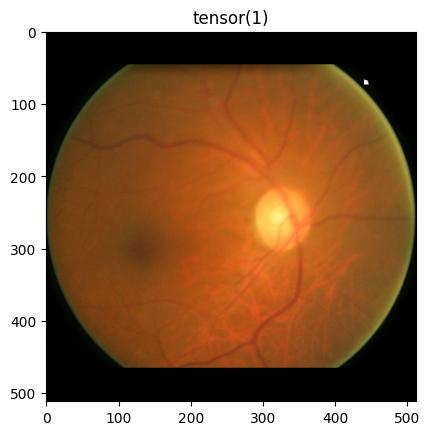

In [8]:
from torch.utils.data import Dataset

# see youtube vid about how to create custom datasets
# https://www.analyticsvidhya.com/blog/2021/09/torch-dataset-and-dataloader-early-loading-of-data/
# https://youtu.be/NVxCKdp0NhQ
class CustomDS(Dataset):
    def __init__(self, dataAndLables):
        self.dataAndLabels = dataAndLables

    def __len__(self):
        return len(self.dataAndLabels)
    
    def __getitem__(self, index):
        img = self.dataAndLabels[index][0]
        label = self.dataAndLabels[index][1]
        return img,label
    

ds = CustomDS(dataAndLables)

dataloader = torch.utils.data.DataLoader(ds, batch_size=36, shuffle=False)

for img,label in dataloader:
    plt.title(label=label[35])
    plt.imshow(img[35].permute(1,2,0))
    break


#checked the customDS and dataloader, and they were tested/crosschecked to be found ok, img 36 in OG dataset is with glycoma and the label we got from dataloader is 1

In [9]:

train_ds, test_ds = torch.utils.data.random_split(dataset=ds, lengths=[0.7,0.3])
print(len(train_ds))
print(len(test_ds))
print(len(train_ds) + len(test_ds))

455
195
650


In [23]:
import torchvision.transforms as tt
train_transforms = tt.Compose([
    tt.ToPILImage(),
    tt.RandomHorizontalFlip(),
    tt.RandomVerticalFlip(),
    tt.ToTensor()
])

toPIL = tt.ToPILImage()

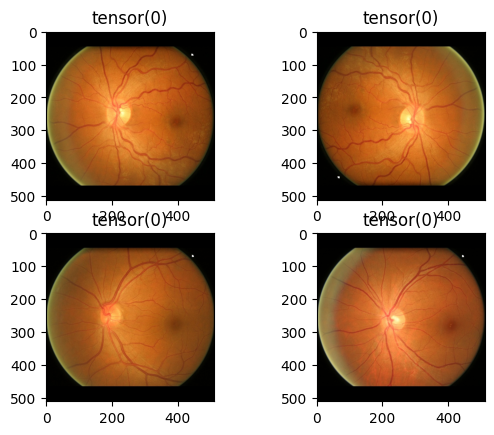

In [24]:
trainLoader = torch.utils.data.DataLoader(train_ds, 4, shuffle=False,)
for img,label in trainLoader:
    plt.subplot(2,2,1)
    plt.title(label=label[0])
    plt.imshow(img[0].permute(1,2,0))

    plt.subplot(2,2,2)
    plt.title(label[0])
    plt.imshow(train_transforms(img[0]).permute(1,2,0)) # applying/testing our trnsform func, FIRST APPLY the transforms func then apply the .premute()

    plt.subplot(2,2,3)
    plt.title(label[2])
    plt.imshow(img[2].permute(1,2,0))

    plt.subplot(2,2,4)
    plt.title(label[3])
    plt.imshow(img[3].permute(1,2,0))

    break

In [26]:
import torch.nn as nn
import torch.functional as F

In [105]:

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        layers = []
        self.conv_net = nn.Sequential(

            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4),
            
            )
        
        self.feedforward = nn.Sequential(

            nn.Flatten(),

            nn.Linear(16384, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        out = self.conv_net(x)
        out = self.feedforward(out)
        return out

In [106]:
model = CNNModel()
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 977281


In [107]:
for img,lable in trainLoader:
    print(img.shape)
    print(model(img).shape)
    break

torch.Size([4, 3, 512, 512])
torch.Size([4, 1])


In [ ]:
class CompleteCNNModel(CNNModel):
    def train_step(loss_func=F., input_batch):
        



